In [1]:
from allensdk.core.nwb_data_set import NwbDataSet
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py 
import os
from matplotlib.backends.backend_pdf import PdfPages
import pickle as pkl
import efel
os.chdir('neuron_genetic_alg')
from config import *
os.chdir('../')

#np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['agg.path.chunksize'] = 10000

# if you ran the examples above, you will have a NWB file here
cell_file_name = f'./model_responses/{model_num}.nwb'
cell_data_set = NwbDataSet(cell_file_name)

allen_file_name = f'./model_responses/{model_num}_allen_model_response_full_dt.nwb'
allen_data_set = NwbDataSet(allen_file_name)

sota_file_name = './compare_response2.hdf5'
sota_data_set = h5py.File(sota_file_name, 'r')

sweep_numbers = sorted(cell_data_set.get_experiment_sweep_numbers())

# sweep_number = sweep_numbers[0] 
# sweep_data = data_set.get_sweep(sweep_number)

# # spike times are in seconds relative to the start of the sweep
# spike_times = data_set.get_spike_times(sweep_number)

# # stimulus is a numpy array in amps
# stimulus = sweep_data['stimulus']

# # response is a numpy array in volts
# reponse = sweep_data['response']

# # sampling rate is in Hz
#sampling_rate = sweep_data['sampling_rate']
#print(sampling_rate)

# # start/stop indices that exclude the experimental test pulse (if applicable)
# index_range = sweep_data['index_range']

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

tick_major = 6
tick_minor = 4
plt.rcParams["xtick.major.size"] = tick_major
plt.rcParams["xtick.minor.size"] = tick_minor
plt.rcParams["ytick.major.size"] = tick_major
plt.rcParams["ytick.minor.size"] = tick_minor

font_small = 12
font_medium = 13
font_large = 14
plt.rc('font', size=font_small)          # controls default text sizes
plt.rc('axes', titlesize=font_medium)    # fontsize of the axes title
plt.rc('axes', labelsize=font_medium)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_small)    # legend fontsize
plt.rc('figure', titlesize=font_large)   # fontsize of the figure title

/var/folders/51/n2d2np955x1_s1f0242lh65r0000gn/T/ipykernel_60342/1387968373.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [3]:
# Read saved file fresh
parsed_stim_response_path = f'./allen_model_sota_model_parsed_cell_{model_num}.hdf5'
data_file = h5py.File(parsed_stim_response_path, 'r')
sweep_keys = [e.decode('ascii') for e in data_file['sweep_keys']]

In [4]:
# Adjust which features and stims we want to compute
import efel
all_features = efel.api.getFeatureNames()

In [5]:
efel_data = pkl.load(open(f'./efel_data/efel_dataset_model_{model_num}.pkl', 'rb'))

In [6]:
selected_efel_features_active = [#'time_to_first_spike',
                    'time_to_second_spike',
                    'time_to_last_spike',
                    'Spikecount',
                    #'Spikecount_stimint',
                    #'number_initial_spikes',
                    #'mean_frequency',
                    #'ISI_semilog_slope',
                    #'ISI_CV',
                    'burst_number',
                    'AP1_amp',
                    'AP2_amp',
                    'APlast_amp',
                    'AP_amplitude_from_voltagebase',
                    'AP1_peak',
                    'AP2_peak',
                    'AP2_AP1_diff',
                    #'AP2_AP1_peak_diff',
                    'AHP_depth_abs',
#                     'AHP_depth_abs_slow',
#                     'AHP_slow_time',
#                     'AHP_depth',
                    'AHP1_depth_from_peak',
                    #'AHP2_depth_from_peak',
                    'AHP_time_from_peak',
                    'min_voltage_between_spikes',
                    #'AP_duration_half_width',
                    'AP_width',
                    'AP1_width',
                    'AP2_width',
                    'APlast_width',
                    #'AP1_begin_width',
                    #'AP2_begin_width',
                    #'AP2_AP1_begin_width_diff',
                    'AP1_begin_voltage',
                    'AP2_begin_voltage',
                    'AP_begin_time',
                    'AP_peak_upstroke',
                    'AP_peak_downstroke',
                    'AP_rise_time',
                    'AP_phaseslope',
                    #'AP_phaseslope_AIS',
                    'steady_state_voltage_stimend',
                    'steady_state_voltage',
                    'voltage_base',
                    #'current_base',
                    'decay_time_constant_after_stim',
                    #'voltage_deflection_vb_ssse',
                    'voltage_deflection',
                    #'voltage_deflection_begin',
                    'voltage_after_stim',
                    'minimum_voltage',
                    'maximum_voltage']
                    #'maximum_voltage_from_voltagebase']

selected_efel_features_passive = ['steady_state_voltage_stimend',
                                'steady_state_voltage',
                                'voltage_base',
                                'decay_time_constant_after_stim',
                                'sag_time_constant',
                                'sag_amplitude',
                                'sag_ratio1',
                                'sag_ratio2',
                                'ohmic_input_resistance',
                                'ohmic_input_resistance_vb_ssse',
                                'voltage_deflection_vb_ssse',
                                'voltage_deflection',
                                'voltage_deflection_begin',
                                'voltage_after_stim',
                                'minimum_voltage',
                                'maximum_voltage_from_voltagebase']


selected_stims_active = ['4',
                  #'8', 
                  #'12',
                  #'22', passivs for sag
                  #'23', passivs for sag
                  #'34', passive for sag
                  '35',
                  '36',
                  '38',
                  '43',
                  '44',
                  '46',
                  #'47_1',
                  '47_2',
                  '47_3',
                  #'48_1',
                  '48_2',
                  '48_3',
                  #'50_1',
                  '50_2',
                  '50_3',
                  #'53_1',
                  '53_2',
                  '53_3',
                  #'56',
                  #'58',
                  '59',
                  '64',
                  '65',
                  '66',
                  '68']

selected_stims_passive = ['8', '12', '13', '14', '15', '16', '22', '23', '28', '30', '31', '34', '47_1', '48_1', '50_1', '53_1']

In [7]:
optimization_obj = h5py.File('./objectives/multi_stim_without_sensitivity_allen_full_11_09_21_stims.hdf5', 'r')
opt_stim_name_list = [e.decode('ascii') for e in optimization_obj['opt_stim_name_list']]
ordered_score_function_list = [e.decode('ascii') for e in optimization_obj['ordered_score_function_list']]

In [8]:
import copy

allen_stim_approx = ['58']
allen_exp_features = ['mean_frequency', 'AP_amplitude', 'AP_duration_half_width', 'time_to_first_spike', 'first_ISI_duration',\
                     'ISI_CV', 'all_ISI_values', 'adaptation_index']
def compute_allen_exp_features(all_efel_features):
    new_features_dict = copy.deepcopy(all_efel_features)
    sweep_keys = all_efel_features.keys()
    for sweep_key in sweep_keys:
        efel_d = all_efel_features[sweep_key]
        for e in ['cell_features', 'allen_features', 'compare_features']:
            if not efel_d['inv_first_ISI'][e] is None and len(efel_d['inv_first_ISI'][e]):
                if 'first_ISI_duration' in new_features_dict[sweep_key]:
                    if efel_d['inv_first_ISI'][e]:
                        new_features_dict[sweep_key]['first_ISI_duration'][e] = [1/efel_d['inv_first_ISI'][e]]
                    else:
                        new_features_dict[sweep_key]['first_ISI_duration'][e] = [0]
                else:
                    if efel_d['inv_first_ISI'][e]:
                        new_features_dict[sweep_key]['first_ISI_duration'] = {e: [1/efel_d['inv_first_ISI'][e]]}
                    else:
                        new_features_dict[sweep_key]['first_ISI_duration'] = {e: [0]}
            if not efel_d['all_ISI_values'][e] is None and len(efel_d['all_ISI_values'][e]):
                if 'adaptation_index' in new_features_dict[sweep_key]:
                    new_features_dict[sweep_key]['adaptation_index'][e] = [(efel_d['all_ISI_values'][e][i+1]-\
                                                                           efel_d['all_ISI_values'][e][i])/sum(efel_d['all_ISI_values'][e]) \
                                                                           for i in range(len(efel_d['all_ISI_values'][e])-1)]
                else:
                    new_features_dict[sweep_key]['adaptation_index'] = {e: [(efel_d['all_ISI_values'][e][i+1]-\
                                                                           efel_d['all_ISI_values'][e][i])/sum(efel_d['all_ISI_values'][e]) \
                                                                           for i in range(len(efel_d['all_ISI_values'][e])-1)]}
    return new_features_dict

efel_data = compute_allen_exp_features(efel_data)


In [9]:
#from scipy.special import sigmoid
feature_devs_scatter_plot_train_compare = []
feature_devs_scatter_plot_train_allen = []
feature_devs_scatter_plot_val = []

for efel_name in selected_efel_features_active+allen_exp_features: #efel.api.getFeatureNames():
    for sweep_key in selected_stims_active+allen_stim_approx: #efel_data.keys():
        target = efel_data[sweep_key][efel_name]['cell_features']
        allen = efel_data[sweep_key][efel_name]['allen_features']
        compare = efel_data[sweep_key][efel_name]['compare_features']
        if not target is None and not allen is None and not compare is None:
            if len(target) and len(allen) and len(compare):
                target_mean = np.mean(target)
                allen_tmp = [abs(e-target_mean) for e in allen]
                compare_tmp = [abs(e-target_mean) for e in compare]
                allen_dev = np.mean(allen_tmp)
                compare_dev = np.mean(compare_tmp)
                #if compare_dev-allen_dev > 0:
                #    print(efel_name)
                if not np.isnan(target_mean) and not np.isnan(allen_dev) and not np.isnan(compare_dev):
                    #allen_dev = abs(target_mean-allen_mean)
                    #compare_dev = abs(target_mean-compare_mean)
                    if allen_dev != 0 and compare_dev != 0:
                        if efel_name in allen_exp_features and sweep_key in allen_stim_approx:
                            feature_devs_scatter_plot_train_allen.append(np.log10([1+allen_dev, 1+compare_dev]))
                        elif efel_name in ordered_score_function_list and sweep_key in opt_stim_name_list:
                            feature_devs_scatter_plot_train_compare.append(np.log10([1+allen_dev, 1+compare_dev]))
                        else:
                            feature_devs_scatter_plot_val.append(np.log10([1+allen_dev, 1+compare_dev]))

for efel_name in selected_efel_features_passive+allen_exp_features: #efel.api.getFeatureNames():
    for sweep_key in selected_stims_passive+allen_stim_approx: #efel_data.keys():
        target = efel_data[sweep_key][efel_name]['cell_features']
        allen = efel_data[sweep_key][efel_name]['allen_features']
        compare = efel_data[sweep_key][efel_name]['compare_features']
        if not target is None and not allen is None and not compare is None:
            if len(target) and len(allen) and len(compare):
                target_mean = np.mean(target)
                allen_tmp = [abs(e-target_mean) for e in allen]
                compare_tmp = [abs(e-target_mean) for e in compare]
                allen_dev = np.mean(allen_tmp)
                compare_dev = np.mean(compare_tmp)
                #if compare_dev-allen_dev > 0:
                #    print(efel_name)
                if not np.isnan(target_mean) and not np.isnan(allen_dev) and not np.isnan(compare_dev):
                    #allen_dev = abs(target_mean-allen_mean)
                    #compare_dev = abs(target_mean-compare_mean)
                    if allen_dev != 0 and compare_dev != 0:
                        if efel_name in allen_exp_features and sweep_key in allen_stim_approx:
                            feature_devs_scatter_plot_train_allen.append(np.log10([1+allen_dev, 1+compare_dev]))
                        elif efel_name in ordered_score_function_list and sweep_key in opt_stim_name_list:
                            feature_devs_scatter_plot_train_compare.append(np.log10([1+allen_dev, 1+compare_dev]))
                        else:
                            feature_devs_scatter_plot_val.append(np.log10([1+allen_dev, 1+compare_dev]))

feature_devs_scatter_plot_train_compare = np.array(feature_devs_scatter_plot_train_compare).T
feature_devs_scatter_plot_train_allen = np.array(feature_devs_scatter_plot_train_allen).T
feature_devs_scatter_plot_val = np.array(feature_devs_scatter_plot_val).T
        

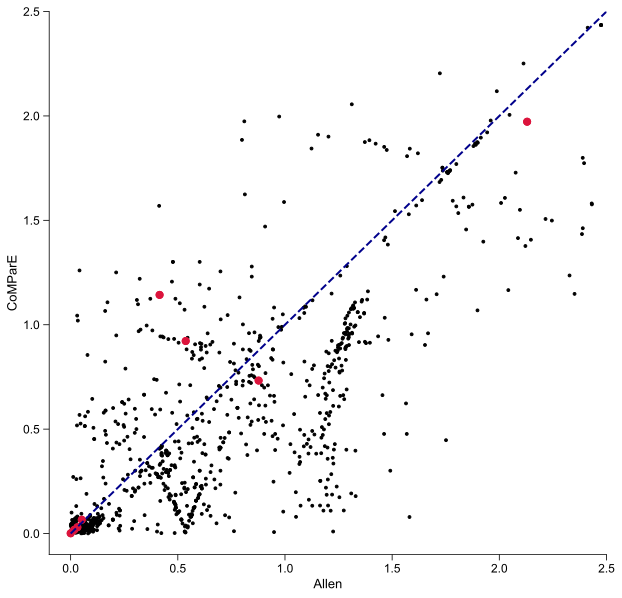

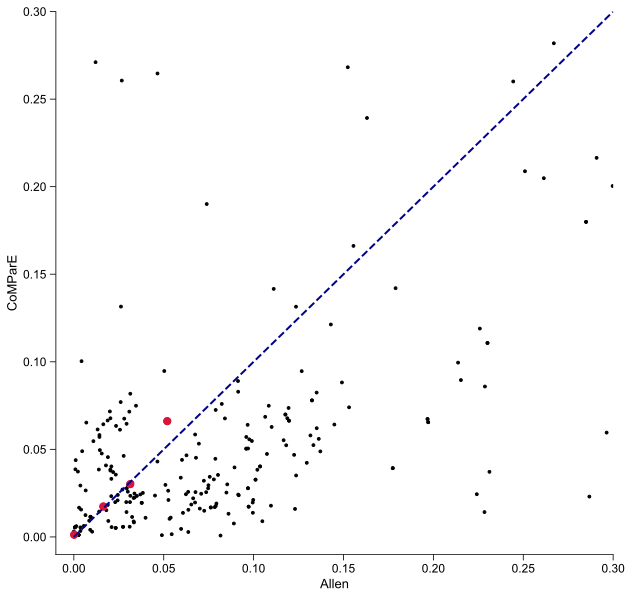

In [32]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.scatter(feature_devs_scatter_plot_train_compare[0], feature_devs_scatter_plot_train_compare[1], color='black', s=8)
ax.scatter(feature_devs_scatter_plot_val[0], feature_devs_scatter_plot_val[1], color='black', s=8)
ax.scatter(feature_devs_scatter_plot_train_allen[0], feature_devs_scatter_plot_train_allen[1], color='crimson', s=50)
ax.axis(xmin=-0.1, xmax=2.5, ymin=-0.1, ymax=2.5)
ax.plot(np.arange(0, 3, 0.01), (np.arange(0, 3, 0.01)), color='darkblue', linewidth=2, linestyle='--', alpha=1)
plt.xlabel('Allen')
plt.ylabel('CoMParE')
plt.show()
fig.savefig("scatter_plot_large.pdf", bbox_inches='tight')

fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.scatter(feature_devs_scatter_plot_train_compare[0], feature_devs_scatter_plot_train_compare[1], color='black', s=8)
ax.scatter(feature_devs_scatter_plot_val[0], feature_devs_scatter_plot_val[1], color='black', s=8)
ax.scatter(feature_devs_scatter_plot_train_allen[0], feature_devs_scatter_plot_train_allen[1], color='crimson', s=50)
ax.axis(xmin=-0.01, xmax=0.3, ymin=-0.01, ymax=0.3)
ax.plot(np.arange(0, 3, 0.01), (np.arange(0, 3, 0.01)), color='darkblue', linewidth=2, linestyle='--', alpha=1)
plt.xlabel('Allen')
plt.ylabel('CoMParE')
plt.show()
fig.savefig("scatter_plot_small.pdf", bbox_inches='tight')


# print('Percent of dots under y = x line:', 
#      str(len([1 for i in range(len(feature_devs_scatter_plot[0])) if feature_devs_scatter_plot[0][i] > feature_devs_scatter_plot[1][i]])/len(feature_devs_scatter_plot[0])*100)[:5], '%')

In [14]:
distance_from_central = []
distance_from_central_allen = []
for i in range(len(feature_devs_scatter_plot_train_compare[0])):
    x_cord = feature_devs_scatter_plot_train_compare[0][i]
    y_cord = feature_devs_scatter_plot_train_compare[1][i]
    dist = abs(x_cord-y_cord)/np.sqrt(2)
    if y_cord > x_cord:
        distance_from_central.append(-dist)
    else:
        distance_from_central.append(dist)
        
for i in range(len(feature_devs_scatter_plot_val[0])):
    x_cord = feature_devs_scatter_plot_val[0][i]
    y_cord = feature_devs_scatter_plot_val[1][i]
    dist = abs(x_cord-y_cord)/np.sqrt(2)
    if y_cord > x_cord:
        distance_from_central.append(-dist)
    else:
        distance_from_central.append(dist)
        
for i in range(len(feature_devs_scatter_plot_train_allen[0])):
    x_cord = feature_devs_scatter_plot_train_allen[0][i]
    y_cord = feature_devs_scatter_plot_train_allen[1][i]
    dist = abs(x_cord-y_cord)/np.sqrt(2)
    if y_cord > x_cord:
        distance_from_central.append(-dist)
        distance_from_central_allen.append(-dist)
    else:
        distance_from_central.append(dist)
        distance_from_central_allen.append(dist)

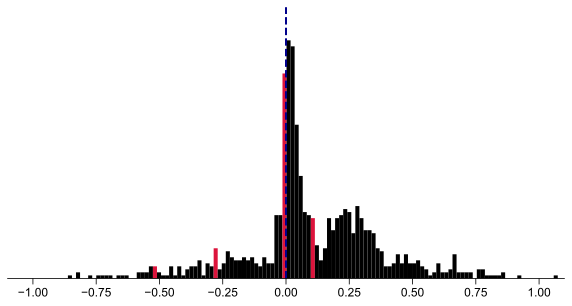

In [26]:
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(0, 90)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axvline(0, color='darkblue' ,linewidth=2, linestyle='--')
N, bins, patches = plt.hist(distance_from_central, bins=250, color='black')
for i in range(len(bins)-1):
    for j in range(len(distance_from_central_allen)):
        if bins[i] <= distance_from_central_allen[j] and distance_from_central_allen[j] < bins[i+1]:
            patches[i].set_facecolor('crimson')
fig.savefig("scatter_distance_hist.pdf", bbox_inches='tight')

In [22]:
distance_from_central_allen

[-0.2723929268039469,
 0.10209967801034513,
 -0.0007051497315956378,
 -0.5148030478944292,
 -0.009998310976456764,
 0.0008730872514047265,
 0.11133477361242944,
 -0.0007620193531361575,
 -0.2723929268039469,
 0.10209967801034513,
 -0.0007051497315956378,
 -0.5148030478944292,
 -0.009998310976456764,
 0.0008730872514047265,
 0.11133477361242944,
 -0.0007620193531361575]

NameError: name 'feature_devs_scatter_plot' is not defined

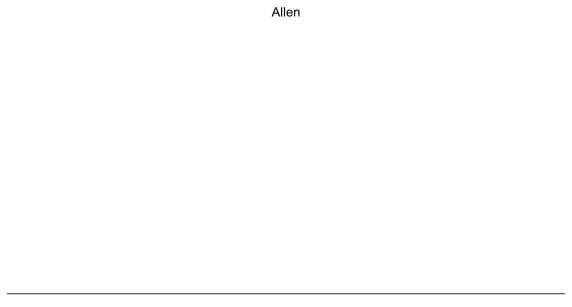

In [13]:
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_xlim(-0.1, 2.5)
#ax.set_ylim(0, 90)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
#ax.axvline(0, color='black' ,linewidth=2, linestyle='--')
ax.set_title('Allen')
_ = plt.hist(feature_devs_scatter_plot[0], bins=150, color='black')
fig.savefig("scatter_hist_allen.pdf", bbox_inches='tight')

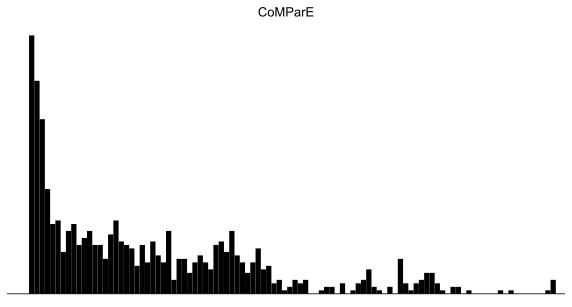

In [21]:
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_xlim(-0.1, 2.5)
#ax.set_ylim(0, 90)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
#ax.axvline(0, color='black' ,linewidth=2, linestyle='--')
ax.set_title('CoMParE')
_ = plt.hist(feature_devs_scatter_plot[1], bins=150, color='black')
fig.savefig("scatter_hist_compare.pdf", bbox_inches='tight')